Collect Combined Cycle Power Plant (CCPP) dataset, which contains 9568 observations
from UCI repository. Perform exploratory data analysis (EDA) to understand the data
distribution, detect missing values, and visualize relationships between features and the
target variable. Preprocess the data. Split the dataset into training (80%) and testing
(20%) sets. Implement at least two regression models, such as Linear Regression,
Decision Tree Regression, Random Forest Regression, or any other advanced technique
of your choice. Evaluate the models using appropriate regression performance metrics.
Compare the performance of the models and justify which model is more suitable for
predicting power output. 

In [355]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import math
import graphviz
plt.style.use('ggplot')


In [275]:
ccpp = fetch_ucirepo(id = 294)
ccpp_X = ccpp.data.features
ccpp_y = ccpp.data.targets

Here the dataset has four features
* AT - Ambient Temperature
* AP - Ambient Pressure
* RH - Relative Humidity
* V - Exhaust Vacuum

And the target variable - **PE** -> Net Hourly Electrical Energy Output

In [276]:
ccpp_X

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [277]:
ccpp_X.describe()

,AT,V,AP,RH
count,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978
std,7.452473,12.707893,5.938784,14.600269
min,1.810000,25.360000,992.890000,25.560000
25%,13.510000,41.740000,1009.100000,63.327500
50%,20.345000,52.080000,1012.940000,74.975000
75%,25.720000,66.540000,1017.260000,84.830000
max,37.110000,81.560000,1033.300000,100.160000


In [278]:
ccpp_X.var()

AT     55.539357
V     161.490544
AP     35.269152
RH    213.167848
dtype: float64

In [279]:
ccpp_y

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90
...,...
9563,460.03
9564,469.62
9565,429.57
9566,435.74


Checking for null values

In [280]:
print(ccpp_X.isnull().sum())
print(ccpp_y.isnull().sum())

AT    0
V     0
AP    0
RH    0
dtype: int64
PE    0
dtype: int64


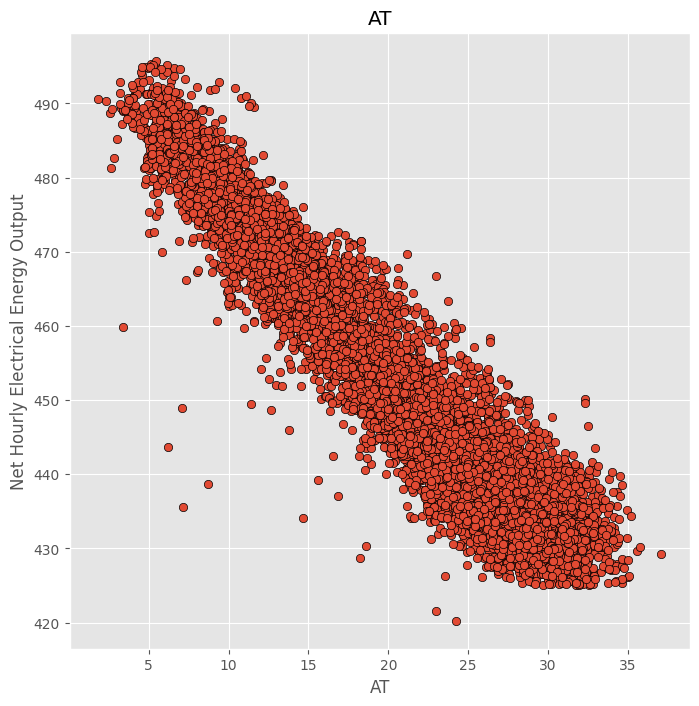

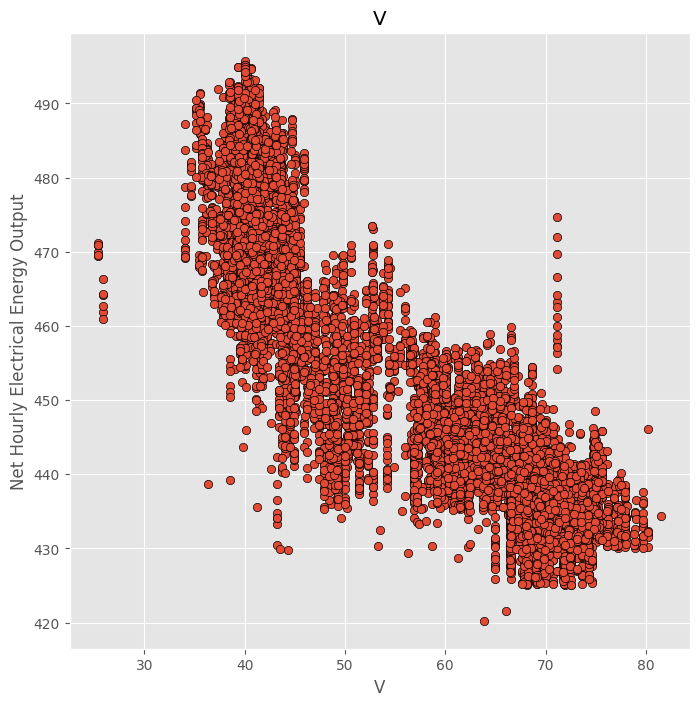

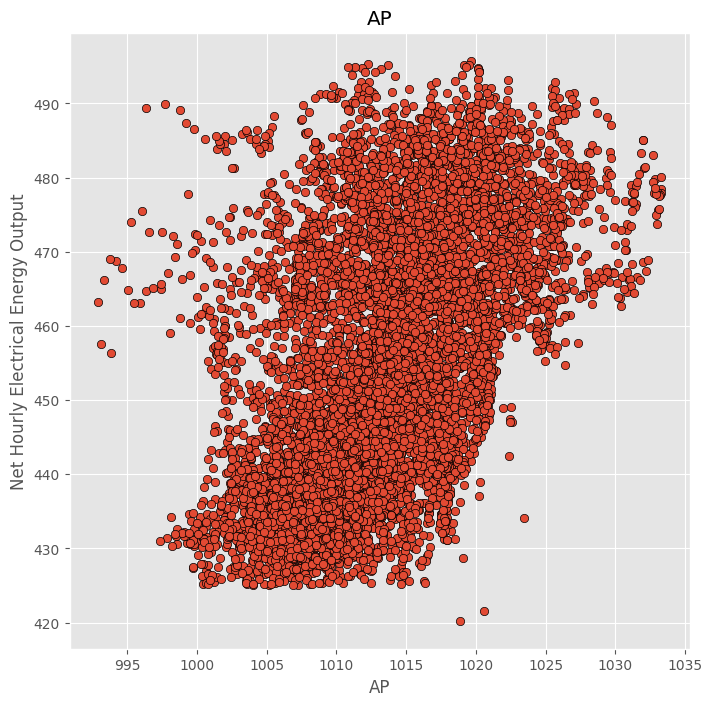

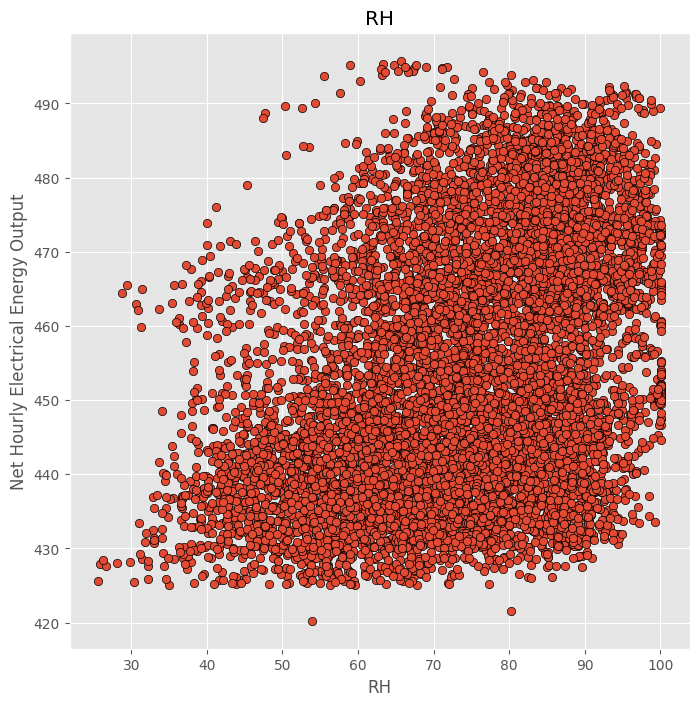

In [281]:
for column in ccpp_X.columns:
    plt.figure(figsize = (8,8))
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Net Hourly Electrical Energy Output')
    plt.scatter(ccpp_X[column], ccpp_y, edgecolors='k')
    plt.show()


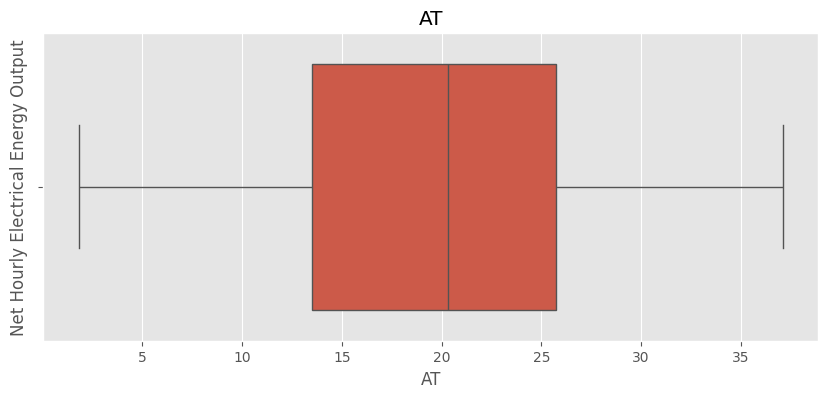

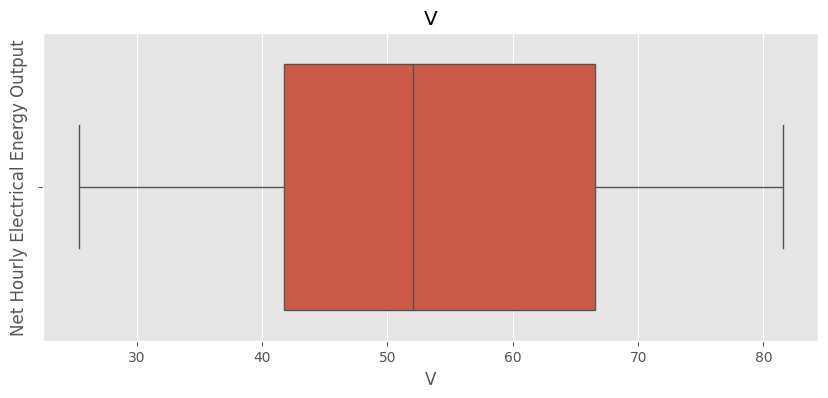

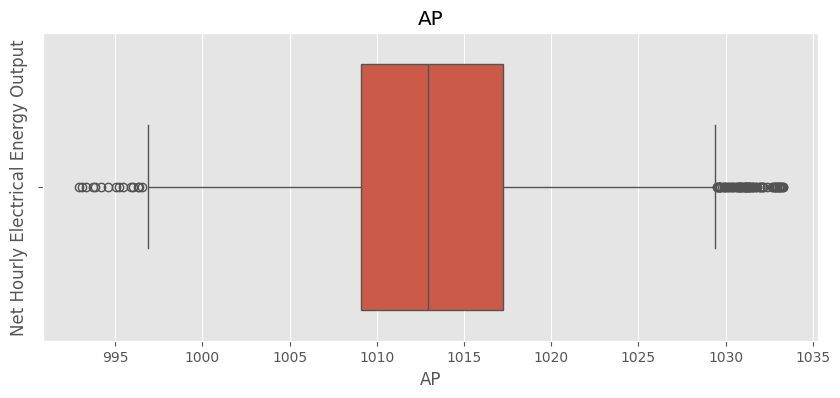

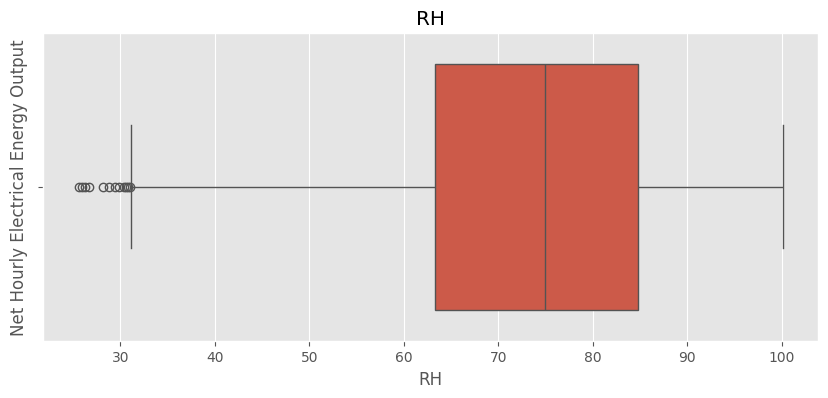

In [282]:
for column in ccpp_X.columns:
    plt.figure(figsize = (10,4))
    plt.title(column)
    sns.boxplot(x=ccpp_X[column], orient="y")
    plt.xlabel(column)
    plt.ylabel('Net Hourly Electrical Energy Output')
    plt.show()

The features RH -> relative humidity and AP -> Ambient Pressure, shows some outliers in the boxplots. So, we remove these outliers using the IQR method and ca

In [283]:
combined = pd.concat([ccpp_X, ccpp_y], axis=1)

ap_q1 = ccpp_X['AP'].quantile(0.25)
ap_q3 = ccpp_X['AP'].quantile(0.75)

ap_iqr = ap_q3 - ap_q1
ap_lower_bound = ap_q1 - 1.5 * ap_iqr
ap_upper_bound = ap_q3 + 1.5 * ap_iqr


# ccpp_X.loc[ccpp_X['AP'] < ap_lower_bound, 'AP'] = ap_lower_bound
# ccpp_X.loc[ccpp_X['AP'] > ap_upper_bound, 'AP'] = ap_upper_bound

combined.drop(combined[combined['AP'] < ap_lower_bound].index, inplace=True)
combined.drop(combined[combined['AP'] > ap_upper_bound].index, inplace=True)


rh_q1 = ccpp_X['RH'].quantile(0.25)
rh_q3 = ccpp_X['RH'].quantile(0.75)

rh_iqr = rh_q3 - rh_q1
rh_lower_bound = rh_q1 - 1.5 * rh_iqr
rh_upper_bound = rh_q3 + 1.5 * rh_iqr

# ccpp_X.loc[ccpp_X['RH'] < rh_lower_bound, 'RH'] = rh_lower_bound    
# ccpp_X.loc[ccpp_X['RH'] > rh_upper_bound, 'RH'] = rh_upper_bound

combined.drop(combined[combined['RH'] < rh_lower_bound].index, inplace=True)
combined.drop(combined[combined['RH'] > rh_upper_bound].index, inplace=True)

                              



In [284]:
ccpp_X = combined.drop(columns=['PE'])
ccpp_y = combined.drop(columns=['AT', 'V', 'AP', 'RH'])

In [285]:
ccpp_X

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [286]:
ccpp_y

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90
...,...
9563,460.03
9564,469.62
9565,429.57
9566,435.74


In [287]:
print(ccpp_X.shape)
print(ccpp_y.shape)

(9468, 4)
(9468, 1)


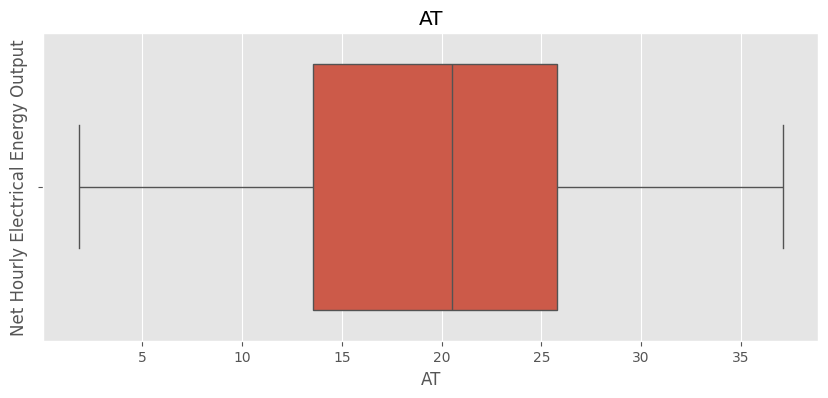

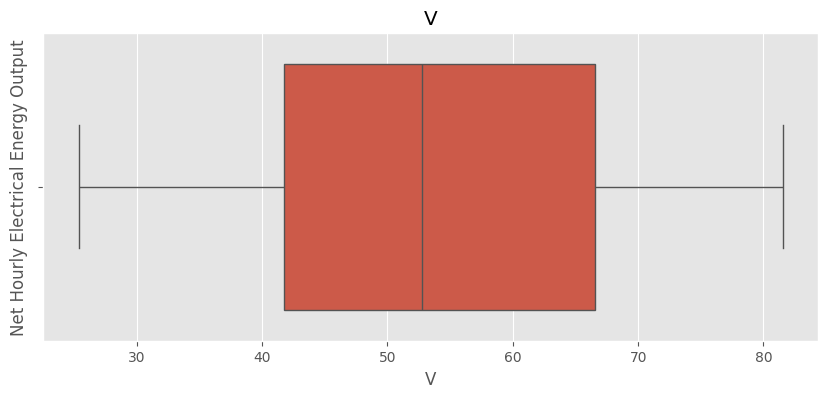

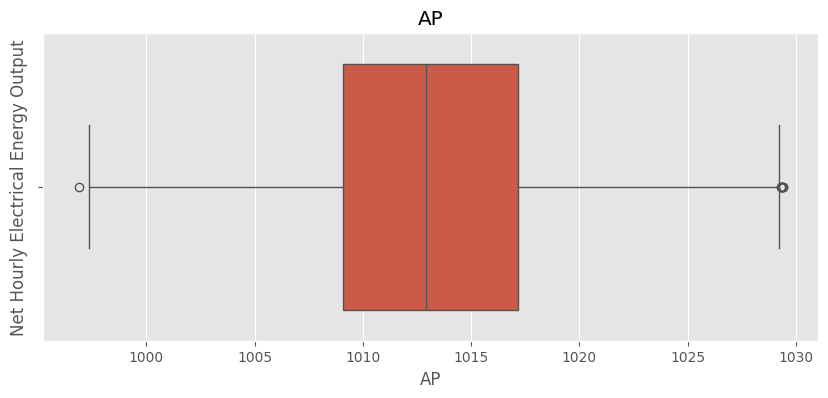

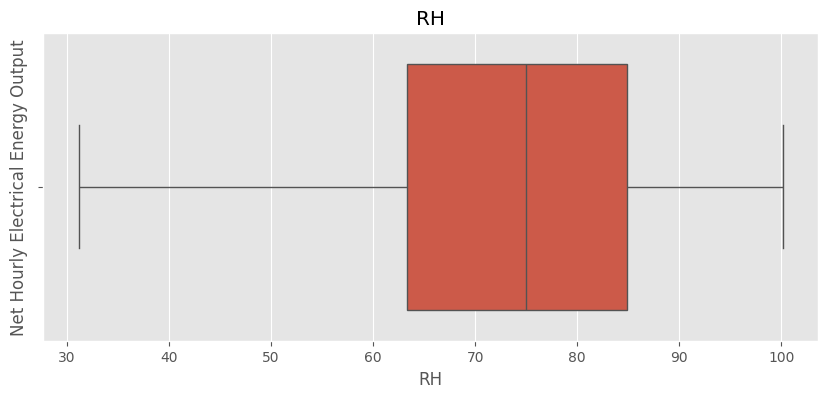

In [288]:
for column in ccpp_X.columns:
    plt.figure(figsize = (10,4))
    plt.title(column)
    sns.boxplot(x=ccpp_X[column], orient="y")
    plt.xlabel(column)
    plt.ylabel('Net Hourly Electrical Energy Output')
    plt.show()

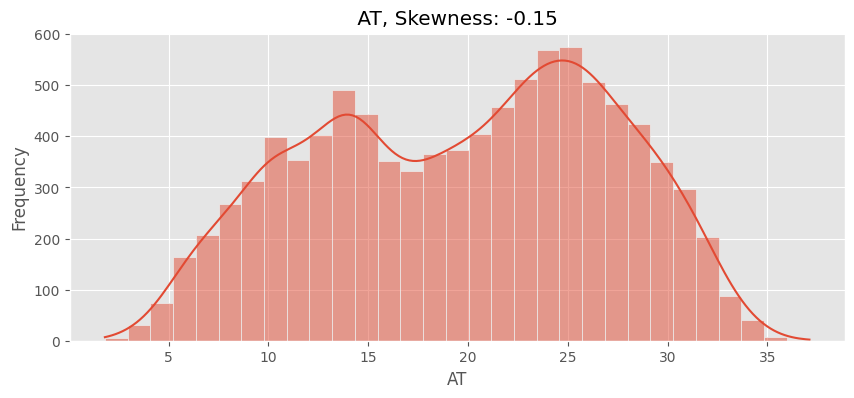

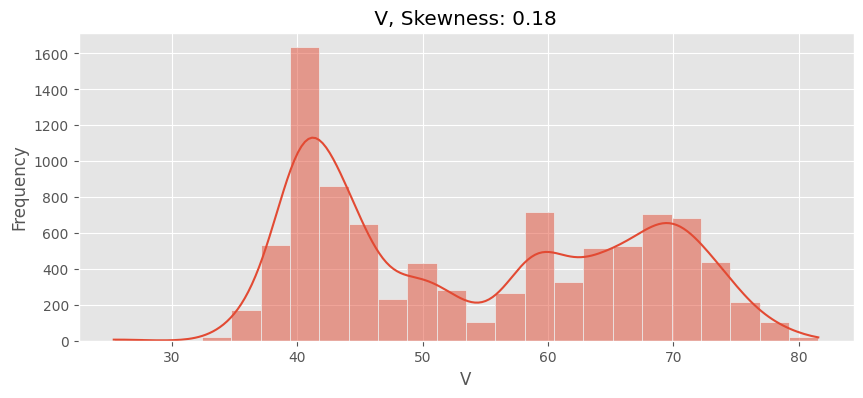

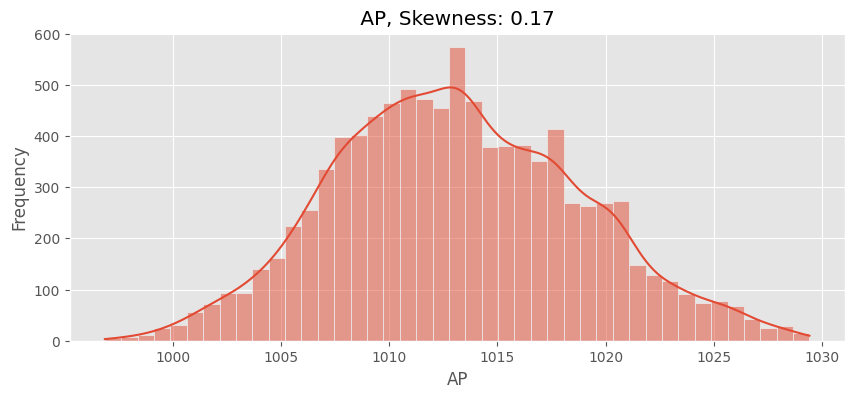

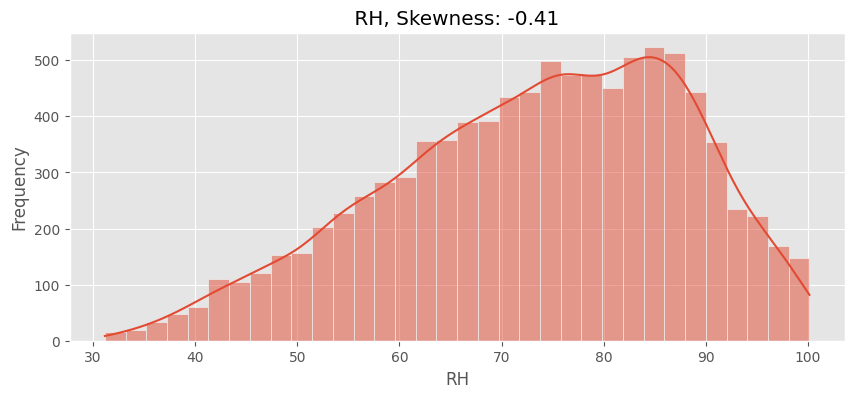

In [289]:
for column in ccpp_X.columns:

    skewness = ccpp_X[column].skew()
    q1 = ccpp_X[column].quantile(0.25)
    q3 = ccpp_X[column].quantile(0.75)

    iqr = q3 - q1

    bin_width = 2 * iqr / (len(ccpp_X[column]) ** (1/3))
    nbins = math.ceil((ccpp_X[column].max() - ccpp_X[column].min()) / bin_width)
    plt.figure(figsize = (10,4))
    plt.title(f" {column}, Skewness: {skewness:.2f} ")

    plt.xlabel(column)
    plt.ylabel('Frequency')
    sns.histplot(ccpp_X[column], bins=nbins, kde=True)
    plt.show()

# plt.figure(figsize = (10,4))
# plt.title(f"Net Hourly Electrical Energy Output, {ccpp_y['PE'].skew():.2f} ")
# plt.xlabel('Net Hourly Electrical Energy Output')
# plt.ylabel('Frequency')
# pe_q1 = ccpp_y['PE'].quantile(0.25)
# pe_q3 = ccpp_y['PE'].quantile(0.75)

# pe_iqr = pe_q3 - pe_q1

# bin_width_pe = 2 * pe_iqr / (len(ccpp_y['PE']) ** (1/3))
# nbins_pe = math.ceil((ccpp_y['PE'].max() - ccpp_y['PE'].min()) / bin_width_pe)

# sns.histplot(ccpp_y, bins=nbins_pe, kde=True)

Using the Quantile Transformation to remove the skewness from the features

In [182]:
qt = QuantileTransformer(output_distribution='normal')
ccpp_X_transformed = qt.fit_transform(ccpp_X)
# ccpp_y_transformed = qt.fit_transform(ccpp_y)

In [291]:
# ccpp_X_transformed_df = pd.DataFrame(ccpp_X_transformed, columns=ccpp_X.columns)
ccpp_X_transformed_df = ccpp_X.copy()
# ccpp_y_transformed_df = pd.DataFrame(ccpp_y_transformed, columns=ccpp_y.columns)

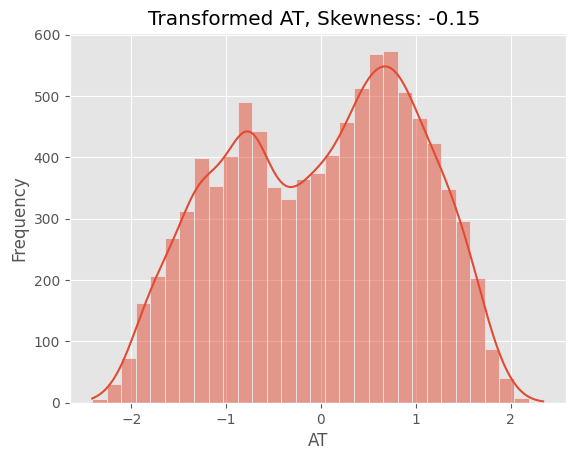

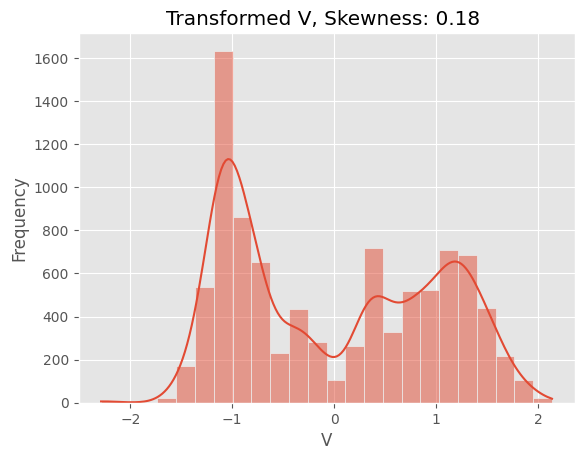

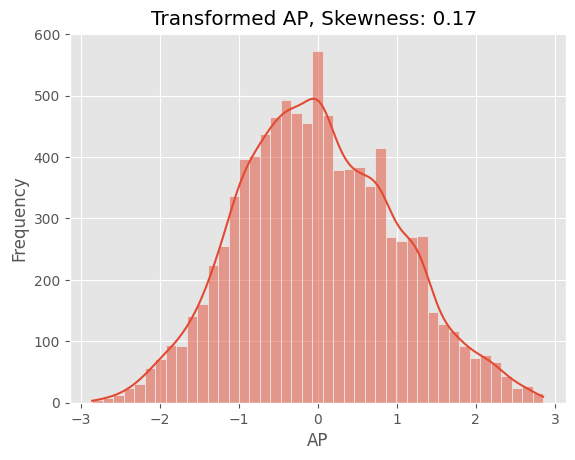

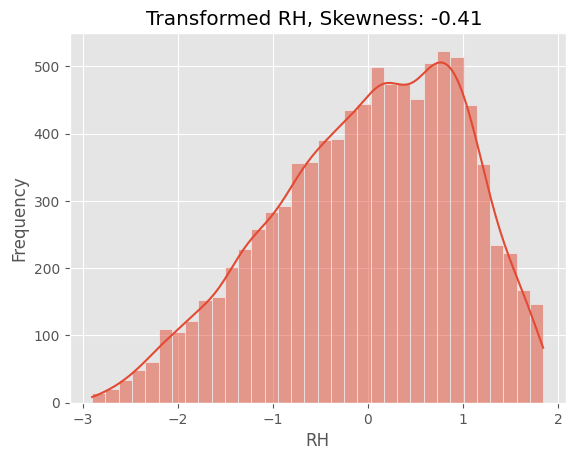

In [262]:
for column in ccpp_X.columns:

    q1 = ccpp_X[column].quantile(0.25)
    q3 = ccpp_X[column].quantile(0.75)

    iqr = q3 - q1

    bin_width = 2 * iqr / (len(ccpp_X[column]) ** (1/3))
    nbins = math.ceil((ccpp_X[column].max() - ccpp_X[column].min()) / bin_width)

    sns.histplot(ccpp_X_transformed_df[column], bins=nbins, kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f"Transformed {column}, Skewness: {ccpp_X_transformed_df[column].skew():.2f} ")
    plt.show()


    

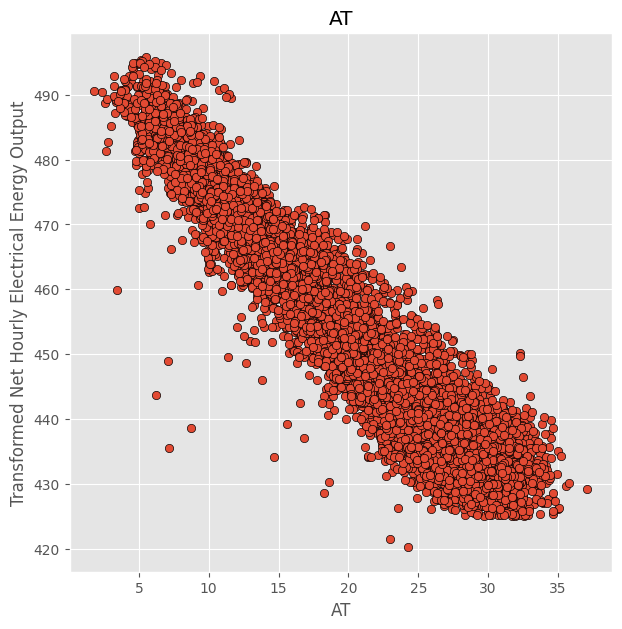

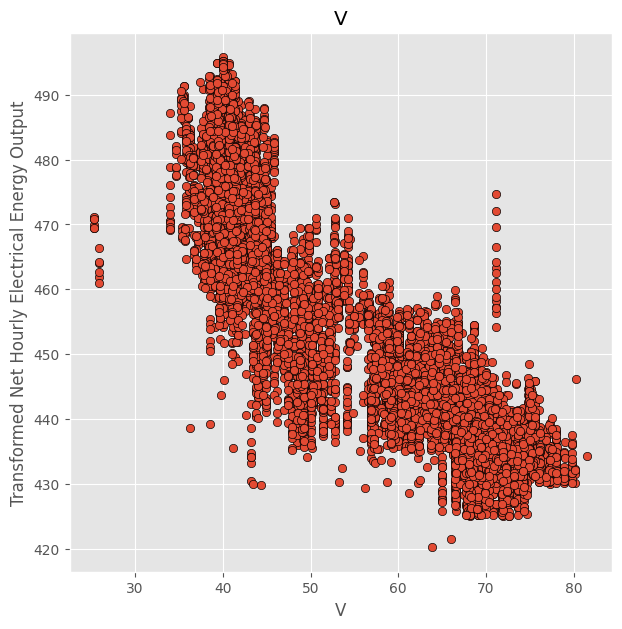

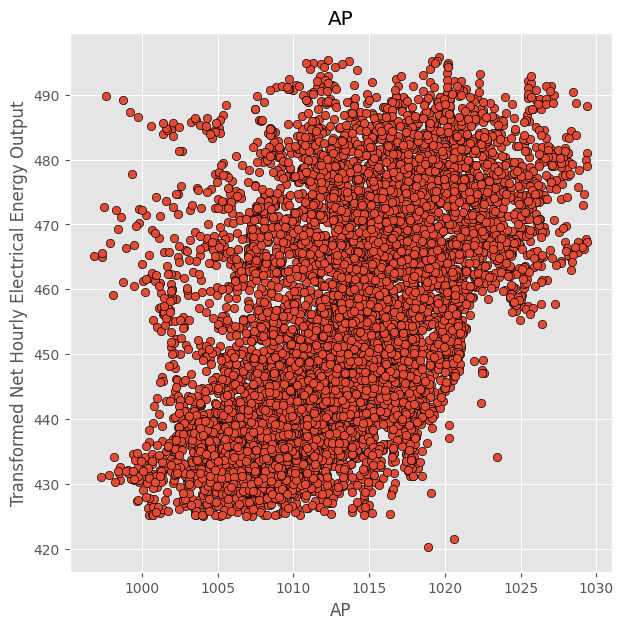

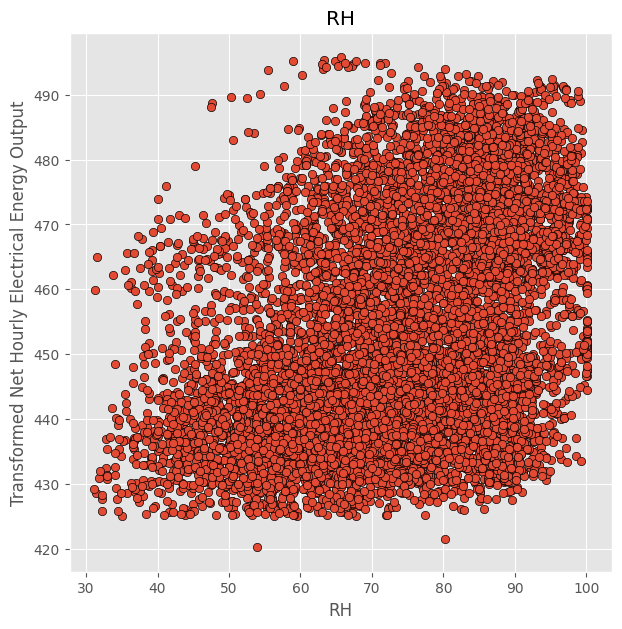

In [292]:
for column in ccpp_X.columns:
    plt.figure(figsize = (7, 7))
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Transformed Net Hourly Electrical Energy Output')
    sns.scatterplot(x = ccpp_X[column], y = ccpp_y['PE'], edgecolors='k')
    plt.show()



Creating train and test splits

In [293]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(ccpp_X, ccpp_y,train_size=0.8, test_size=0.2, random_state=42)

In [294]:
y_train_1

,PE
6318,436.64
9189,433.24
4035,450.67
4451,431.03
475,475.72
...,...
5793,432.47
5246,431.25
5446,454.92
872,481.96


Creating a linear regression model

In [318]:
lr_01 = linear_model.LinearRegression()

In [319]:
lr_01.fit(X_train_1, y_train_1)

LinearRegression()

In [320]:
lr_01.coef_

array([[-1.96432538, -0.23577974,  0.07405013, -0.1542034 ]])

In [321]:
lr_01.intercept_

array([442.03644844])

In [322]:
y_pred_1 = lr_01.predict(X_test_1)
y_pred_1

array([[436.46734187],
       [466.93069315],
       [450.73333031],
       ...,
       [441.03171793],
       [473.26441275],
       [460.50302192]], shape=(1894, 1))

In [300]:
y_test_1.to_numpy().flatten()

array([430.4 , 468.8 , 451.13, ..., 437.78, 478.88, 456.55], shape=(1894,))

Creating a scatter plot to compare the predicted and actual values

In [301]:
X_test_1.to_numpy().ravel()

array([  26.21,   70.32, 1007.  , ...,   43.72, 1009.64,   77.86],
      shape=(7576,))

<Axes: >

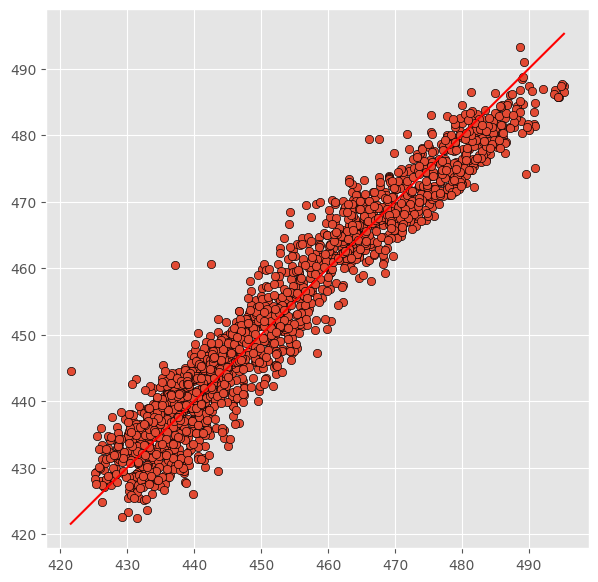

In [323]:
plt.figure(figsize = (7, 7))
sns.scatterplot(x = y_test_1.to_numpy().flatten(), y = y_pred_1.flatten(), edgecolors='k')
sns.lineplot(x = [y_test_1.to_numpy().min(), y_test_1.to_numpy().max()], y = [y_test_1.to_numpy().min(), y_test_1.to_numpy().max()], color='red')

Text(0, 0.5, 'Predicted Net Hourly Electrical Energy Output')

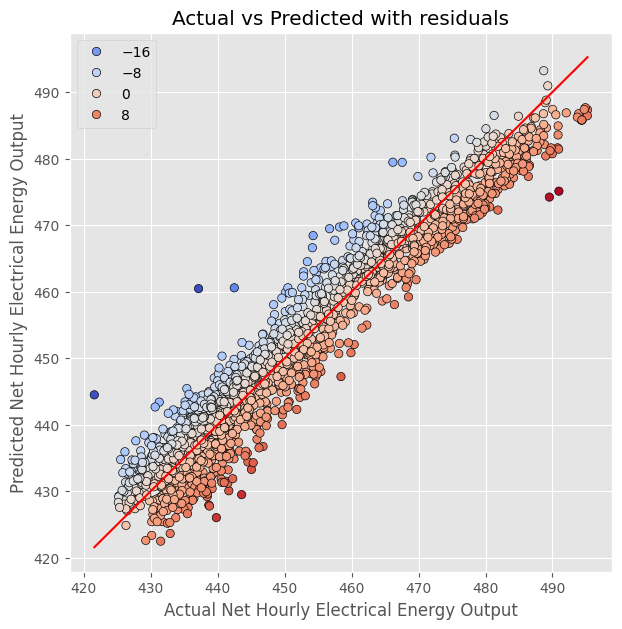

In [324]:
residuals = y_test_1.to_numpy().flatten() - y_pred_1.flatten()

plt.figure(figsize = (7, 7))
plt.title('Actual vs Predicted with residuals')
sns.scatterplot(x = y_test_1.to_numpy().flatten(), y = y_pred_1.flatten(), edgecolors='k', hue = residuals, palette = 'coolwarm')
sns.lineplot(x = [y_test_1.to_numpy().min(), y_test_1.to_numpy().max()], y = [y_test_1.to_numpy().min(), y_test_1.to_numpy().max()], color='red')
plt.xlabel('Actual Net Hourly Electrical Energy Output')
plt.ylabel('Predicted Net Hourly Electrical Energy Output')

Calculating MSE, MAE and $`R^2`$ score of the linear regressor model

In [325]:


mse = mean_squared_error(y_test_1, y_pred_1)
mae = mean_absolute_error(y_test_1, y_pred_1)
r2 = r2_score(y_test_1, y_pred_1)

print(f"The mean squared error of the linear regression model is: {round(mse, 2)}")
print(f"The mean absolute error of the linear regression model is: {round(mae, 2)}")
print(f"The r-squared of the linear regression model is: {round(r2, 2)}")

The mean squared error of the linear regression model is: 20.06
The mean absolute error of the linear regression model is: 3.65
The r-squared of the linear regression model is: 0.93


Creating a rendom forest regression model

In [348]:
rfr_01 = RandomForestRegressor(max_features="sqrt", random_state=42)

In [351]:
rfr_01.fit(X_train_1, y_train_1.to_numpy().flatten())

RandomForestRegressor(max_features='sqrt', random_state=42)

In [ ]:
tree = rfr_01.estimators_[0]

dot_file_path = "random_forest_regressor.dot"
export_graphviz(tree, out_file=dot_file_path, feature_names=ccpp_X.columns, filled = True)

with open(dot_file_path) as f:
    dot_graph = f.read()


graph = graphviz.Source(dot_graph)
graph.render("Random_forest_regressor")

In [357]:
y_pred_2 = rfr_01.predict(X_test_1)

<Axes: title={'center': 'Actual vs Predicted with residuals'}>

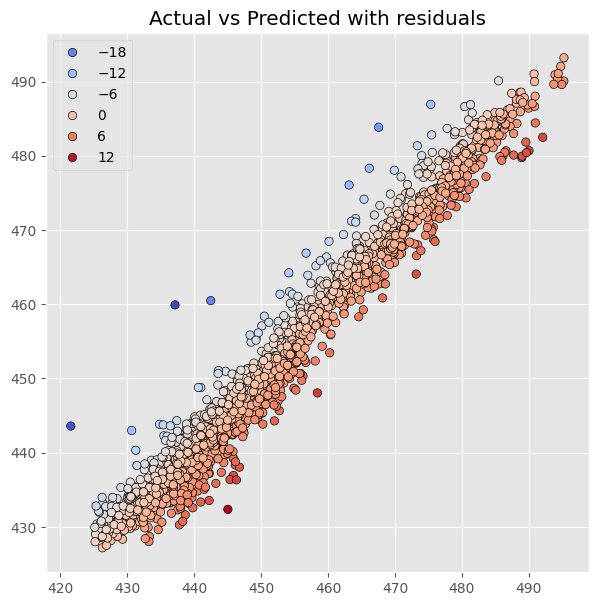

In [361]:
residuals = y_test_1.to_numpy().flatten() - y_pred_2.flatten()

plt.figure(figsize=(7, 7))
plt.title('Actual vs Predicted with residuals')
sns.scatterplot(x = y_test_1.to_numpy().flatten(), y = y_pred_2.flatten(), edgecolors='k', hue = residuals, palette = 'coolwarm')
# sns.lineplot(x = [y_test_1.to_numpy().min(), y_test_1.to_numpy().max()], y = [y_test_1.to_numpy().min(), y_test_1.to_numpy().max()], color='red')

Calculating the performance metrics of the random forest regressor model

In [358]:
mse = mean_squared_error(y_test_1, y_pred_2)
mae = mean_absolute_error(y_test_1, y_pred_2)
r2 = r2_score(y_test_1, y_pred_2)
rmse = math.sqrt(mse)

print(f"The mean squared error of the random forest regressor model is: {round(mse, 2)}")
print(f"The mean absolute error of the random forest regressor model is: {round(mae, 2)}")
print(f"The r-squared of the random forest regressor model is: {round(r2, 2)}")
print(f"The root mean squared error if the random forest regressor model is: {round(rmse, 2)}")

The mean squared error of the random forest regressor model is: 9.63
The mean absolute error of the random forest regressor model is: 2.29
The r-squared of the random forest regressor model is: 0.97
The root mean squared error if the random forest regressor model is: 3.1
